**IMPORT PACKAGES**

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib #for fuller functionality, incl. colors
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
import pandas as pd
from IPython.display import display

from sklearn import mixture

# Remove Deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# for nicer printing
from prettytable import PrettyTable

#increase number of columns can see in pandas
pd.set_option('display.max_columns', 100)

**LOAD INTO DATA FRAME**

In [2]:
df = pd.DataFrame.from_csv("text_files/2016_senators_ontheissues_info.csv")

# #modify index to full_name
df.set_index("full_name", inplace = True)

display(df.head(5))

,first_name,last_name,party,state,url,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,
Richard_Shelby,Richard,Shelby,R,AL,http://www.ontheissues.org/Senate/Richard_Shel...,5,5,5,3,2,2,5,-2,3,5,5,5,-3,5,5,3,5,5,5,2,37,33
Jeff_Sessions,Jeff,Sessions,R,AL,http://www.ontheissues.org/Senate/Jeff_Session...,5,5,5,5,2,2,5,-2,3,5,5,5,2,5,5,3,5,2,3,5,37,38
Lisa_Murkowski,Lisa,Murkowski,I,AK,http://www.ontheissues.org/Senate/Lisa_Murkows...,3,-3,5,5,-3,2,2,-2,3,5,5,3,5,5,5,-2,5,5,5,2,30,25
Dan_Sullivan,Dan,Sullivan,R,AK,http://www.ontheissues.org/Senate/Dan_Sullivan...,5,0,5,0,5,0,0,5,5,5,0,5,2,2,5,3,5,5,0,2,38,21
John_McCain,John,McCain,R,AZ,http://www.ontheissues.org/Senate/John_McCain.htm,3,-3,-2,3,2,5,5,-2,3,5,2,-2,5,2,3,-5,5,-3,5,2,11,22


In [3]:
#USE JUST NUMERICAL OUTPUT TO QUESTIONS
print "DF SHOULD SHOW QUESTION NUMBERS 1:20 AS COLUMN HEADERS. SCORES REPRESENT +/- TO SOCIAL OR ECONOMIC LIBERAL/CONSERVATIVE SCALE"
display(df[df.columns[5:25]].head())

#SET DF FOR SCORES PER QUESTION
df_scores = df[df.columns[5:25]]

#LOAD AND SHOW QUESTION MAPPING
df_names = pd.DataFrame.from_csv("text_files/issue_number_mapper.csv")
print "QUESTION MAP"
display(df_names)

DF SHOULD SHOW QUESTION NUMBERS 1:20 AS COLUMN HEADERS. SCORES REPRESENT +/- TO SOCIAL OR ECONOMIC LIBERAL/CONSERVATIVE SCALE


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
full_name,,,,,,,,,,,,,,,,,,,,
Richard_Shelby,5,5,5,3,2,2,5,-2,3,5,5,5,-3,5,5,3,5,5,5,2
Jeff_Sessions,5,5,5,5,2,2,5,-2,3,5,5,5,2,5,5,3,5,2,3,5
Lisa_Murkowski,3,-3,5,5,-3,2,2,-2,3,5,5,3,5,5,5,-2,5,5,5,2
Dan_Sullivan,5,0,5,0,5,0,0,5,5,5,0,5,2,2,5,3,5,5,0,2
John_McCain,3,-3,-2,3,2,5,5,-2,3,5,2,-2,5,2,3,-5,5,-3,5,2


QUESTION MAP


,topic_num,topic_desc,topic_cat
0,1,Abortion is a woman's unrestricted right,Social
1,2,Legally require hiring women & minorities,Economic
2,3,Comfortable with same-sex marriage,Social
3,4,Keep God in the public sphere,Social
4,5,Expand ObamaCare,Economic
5,6,Privatize Social Security,Economic
6,7,Vouchers for school choice,Economic
7,8,EPA regulations are too restrictive,Social
8,9,Stricter punishment reduces crime,Social
9,10,Absolute right to gun ownership,Economic


**RUN BASIC PCA ANALYSIS**

In [4]:
def PCA_components_range(data_set,min_components, max_components) :
    """FUNCTION TO ACCEPT A HIGH-DIMENSION DATA SET, MIN AND MAX COMPONENTS, AND PRINT % OF VARIANCE EXPLAINED
    PER NUMBER OF COMPONENTS REMAINING AFTER PCA REDUCTION"""
    for num_components in range(min_components, max_components+1) :
        #set and fit model
        pca_model = PCA(n_components=num_components).fit(data_set)
        #print explained variance per number of components
        print ("Num Components:"+ str(num_components)+(5-len(str(num_components)))*" "+
               "Explained Variance Ratio:"+str('{:0.1%}'.format(np.sum(pca_model.explained_variance_ratio_))))

print "VARIANCE RATIO EXPLANED BY NUMBER OF PCA COMPONENTS KEPT"
PCA_components_range(df_scores,1,20)

VARIANCE RATIO EXPLANED BY NUMBER OF PCA COMPONENTS KEPT
Num Components:1    Explained Variance Ratio:72.1%
Num Components:2    Explained Variance Ratio:77.2%
Num Components:3    Explained Variance Ratio:80.8%
Num Components:4    Explained Variance Ratio:83.6%
Num Components:5    Explained Variance Ratio:85.9%
Num Components:6    Explained Variance Ratio:87.9%
Num Components:7    Explained Variance Ratio:89.6%
Num Components:8    Explained Variance Ratio:91.3%
Num Components:9    Explained Variance Ratio:92.6%
Num Components:10   Explained Variance Ratio:93.7%
Num Components:11   Explained Variance Ratio:94.7%
Num Components:12   Explained Variance Ratio:95.7%
Num Components:13   Explained Variance Ratio:96.5%
Num Components:14   Explained Variance Ratio:97.2%
Num Components:15   Explained Variance Ratio:97.9%
Num Components:16   Explained Variance Ratio:98.5%
Num Components:17   Explained Variance Ratio:99.0%
Num Components:18   Explained Variance Ratio:99.4%
Num Components:19   Expla

### PCA MODEL MAPPING

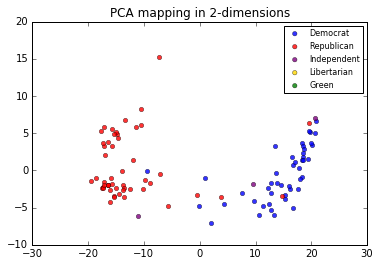

In [5]:
#fit PCA model, fit_transform the original dataset down to same number of dimensions
## based on 20 component --> 2 dimension output
pca_model = PCA(n_components=2).fit(df_scores)

#transform scores into 2-dimension PCA data
scores_reduced = pca_model.transform(df_scores)

#add to original data frame
df['x_pca'] = scores_reduced[:,0]
df['y_pca'] = scores_reduced[:,1]

#set x-axis, y-axis for each of dem, rep, ind, lib, green parties
x_d = df['x_pca'][df['party']=="D"]
x_r = df['x_pca'][df['party']=="R"]
x_i = df['x_pca'][df['party']=="I"]
x_l = df['x_pca'][df['party']=="L"]
x_g = df['x_pca'][df['party']=="G"]

y_d = df['y_pca'][df['party']=="D"]
y_r = df['y_pca'][df['party']=="R"]
y_i = df['y_pca'][df['party']=="I"]
y_l = df['y_pca'][df['party']=="L"]
y_g = df['y_pca'][df['party']=="G"]


#self-note: good reference for setting custom legends with scatter: http://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend

#set individual plots per party
plot_d = plt.scatter(x_d, y_d, marker='o', color='b', linewidth=0.4, edgecolor='black', alpha=0.8)
plot_r = plt.scatter(x_r, y_r, marker='o', color='r', linewidth=0.4, edgecolor='black', alpha=0.8)
plot_i = plt.scatter(x_i, y_i, marker='o', color='purple', linewidth=0.4, edgecolor='black', alpha=0.8)
plot_l = plt.scatter(x_l, y_l, marker='o', color='gold', linewidth=0.4, edgecolor='black', alpha=0.8)
plot_g = plt.scatter(x_g, y_g, marker='o', color='green', linewidth=0.4, edgecolor='black', alpha=0.8)

# plot poisonous mushrooms
# r_plot = plt.scatter(train_data_pois[:,0], train_data_pois[:,1], marker='o', color='r', linewidth=0.4, edgecolor='black', alpha=0.5)

#set up title, legend, and show plot
plt.title('PCA mapping in 2-dimensions')
plt.legend((plot_d, plot_r, plot_i, plot_l, plot_g),
           ("Democrat","Republican","Independent","Libertarian","Green"),
          scatterpoints=1,
           ncol=1,
          loc='upper right',
          fontsize=8)
plt.show()

In [6]:
#NOTE: ALSO SHOW WITH THIS PCA MODEL LAYER ON TOP IN DIFFERENT COLOR CANDIDATES THAT WON VS LOST (NEED IN DIFF TABLE FIRST) (though maybe won't work due to incumbents?)
### ALSO DO K-MEANS CLUSTERING

**K-MEANS CLUSTERING MODEL (BY VARIABLE CLUSTERS)**
_Best Clusters = 9; should determine what groups these may be and give an assignment to people_


TOTAL CLUSTERS: 1


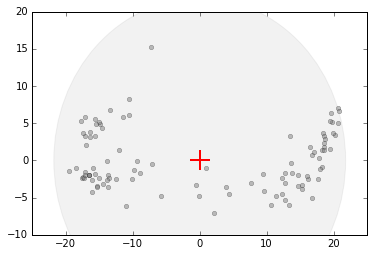


TOTAL CLUSTERS: 2


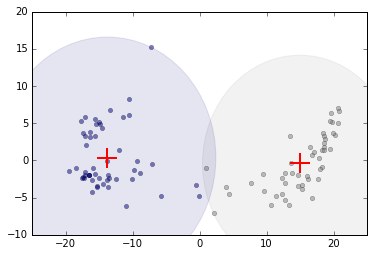


TOTAL CLUSTERS: 3


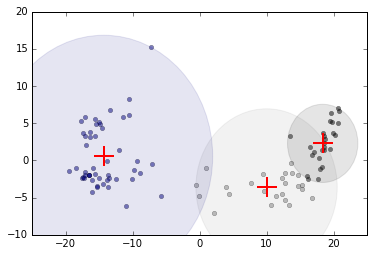


TOTAL CLUSTERS: 4


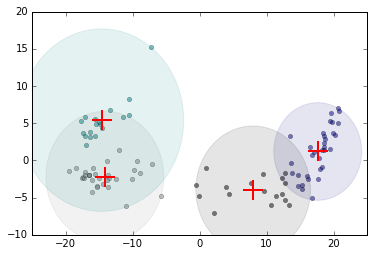


TOTAL CLUSTERS: 5


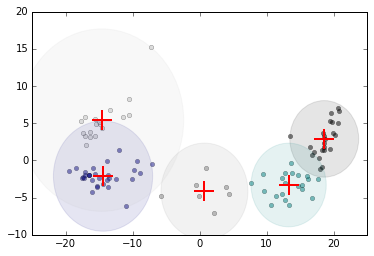


TOTAL CLUSTERS: 6


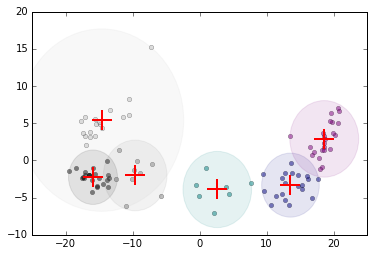


TOTAL CLUSTERS: 7


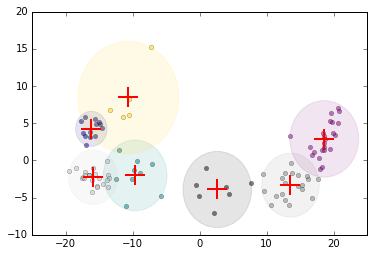


TOTAL CLUSTERS: 8


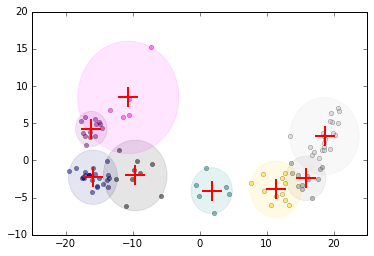


TOTAL CLUSTERS: 9


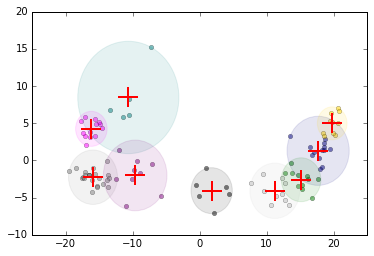


TOTAL CLUSTERS: 10


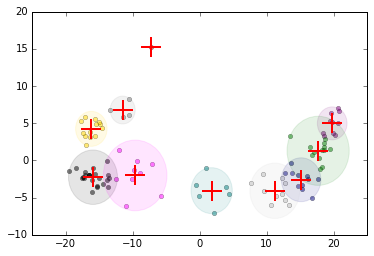


TOTAL CLUSTERS: 11


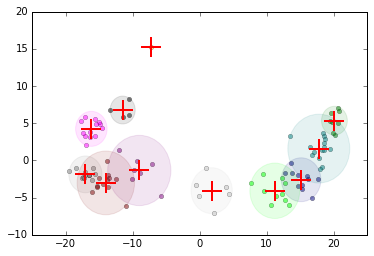


TOTAL CLUSTERS: 12


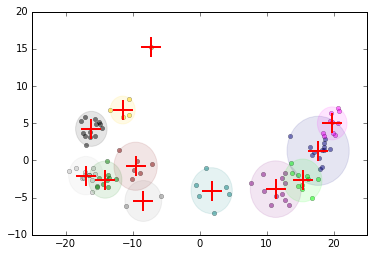


TOTAL CLUSTERS: 13


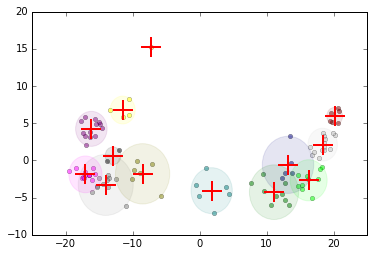


TOTAL CLUSTERS: 14


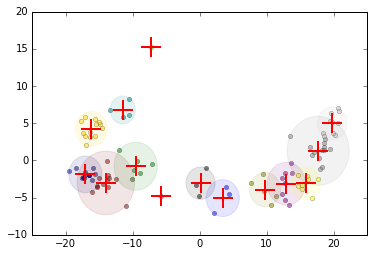


TOTAL CLUSTERS: 15


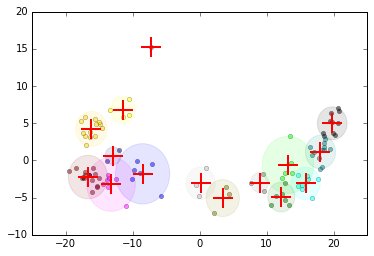


TOTAL CLUSTERS: 16


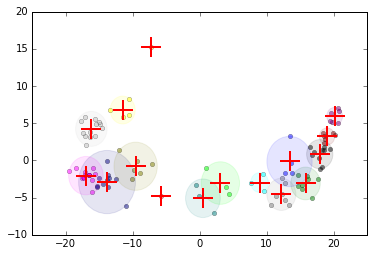

In [7]:
# import random
# random.seed(1)

kmeans_max = 16

#set up 16 colors to consistently map colors to depending on cluster #
colors = ["gray","navy","black","teal","silver","purple","gold",
          "fuchsia","green","maroon","lime","olive","yellow","blue","aqua","red"]

for num in range(kmeans_max):
    #reset matrix back to original PCA training data matrix at start of each for loop
    clusters_matrix = scores_reduced

    #set kmeans number. range starts at 0 but want kmeans to start at 1
    kmeans_num = num+1     

    #set up kmeans model, get centers, labels, distances
    kmeans_model = KMeans(n_clusters=kmeans_num, random_state=1).fit(scores_reduced)
    kmeans_centers = kmeans_model.cluster_centers_
    kmeans_labels = kmeans_model.labels_
    kmeans_distances = kmeans_model.transform(scores_reduced)  #returns matrix with distances to EACH centroid

    #add cluster labels, distances to clusters matrix
    clusters_matrix = np.insert(clusters_matrix, 2, kmeans_labels, axis=1)

    #print k-means number of total clusters
    print "\nTOTAL CLUSTERS:", kmeans_num

    #create sub-loop to plot each cluster
    for num in range(kmeans_num) :

        #add distance to new col in matrix related to centroid number
        clusters_matrix = np.insert(clusters_matrix, 3+num, kmeans_distances[:,num], axis=1)      

        #get kmeans_center for centroid
        kmeans_center_x = kmeans_centers[num][0]
        kmeans_center_y = kmeans_centers[num][1]

        #get just the subset of data belonging to cluster
        clusters_matrix_subset = clusters_matrix[clusters_matrix[:, 2] == num]

        #get max_distance of column related to distance for that centroid; later used for radius
        max_distance = np.max(clusters_matrix_subset[:,3+num])

        #plot just that cluster
        plt.scatter(clusters_matrix_subset[:,0], clusters_matrix_subset[:,1], marker='o', 
                    color=colors[num], linewidth=0.4, edgecolor='black', alpha=0.5)

        #set axes
        plt.xlim(-25, 25)
        plt.ylim(-10, 20)
        
        #plot center associated with that cluster
        plt.plot(kmeans_centers[num][0],kmeans_centers[num][1], marker='+', color='red', 
                 markersize=20, markeredgewidth=2)

        #plot circle (self-note: good reference http://stackoverflow.com/questions/9215658/plot-a-circle-with-pyplot) 
        circle = plt.Circle((kmeans_center_x, kmeans_center_y), max_distance, color=colors[num], alpha=0.1)
        fig = plt.gcf()
        ax = fig.gca()
        ax.add_artist(circle)

    plt.show()

**ADD TO DATA FRAME EACH FOR 7 CLUSTERS AND 9 CLUSTERS**

In [8]:
kmeans_num = 7

#set up kmeans model, get centers, labels, distances
kmeans_model = KMeans(n_clusters=kmeans_num, random_state=1).fit(scores_reduced)
kmeans_centers = kmeans_model.cluster_centers_
kmeans_labels = kmeans_model.labels_
kmeans_distances = kmeans_model.transform(scores_reduced)  #returns matrix with distances to EACH centroid

df['7_clusters'] = kmeans_labels

In [9]:
kmeans_num = 9

#set up kmeans model, get centers, labels, distances
kmeans_model = KMeans(n_clusters=kmeans_num, random_state=1).fit(scores_reduced)
kmeans_centers = kmeans_model.cluster_centers_
kmeans_labels = kmeans_model.labels_
kmeans_distances = kmeans_model.transform(scores_reduced)  #returns matrix with distances to EACH centroid

df['9_clusters'] = kmeans_labels

In [10]:
display(df.head())

,first_name,last_name,party,state,url,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Richard_Shelby,Richard,Shelby,R,AL,http://www.ontheissues.org/Senate/Richard_Shel...,5,5,5,3,2,2,5,-2,3,5,5,5,-3,5,5,3,5,5,5,2,37,33,-14.987148,-2.420313,4,0
Jeff_Sessions,Jeff,Sessions,R,AL,http://www.ontheissues.org/Senate/Jeff_Session...,5,5,5,5,2,2,5,-2,3,5,5,5,2,5,5,3,5,2,3,5,37,38,-15.714461,-1.854490,4,0
Lisa_Murkowski,Lisa,Murkowski,I,AK,http://www.ontheissues.org/Senate/Lisa_Murkows...,3,-3,5,5,-3,2,2,-2,3,5,5,3,5,5,5,-2,5,5,5,2,30,25,-11.081758,-6.140318,3,5
Dan_Sullivan,Dan,Sullivan,R,AK,http://www.ontheissues.org/Senate/Dan_Sullivan...,5,0,5,0,5,0,0,5,5,5,0,5,2,2,5,3,5,5,0,2,38,21,-12.001798,1.349736,3,5
John_McCain,John,McCain,R,AZ,http://www.ontheissues.org/Senate/John_McCain.htm,3,-3,-2,3,2,5,5,-2,3,5,2,-2,5,2,3,-5,5,-3,5,2,11,22,-5.760686,-4.765349,3,5


**DISPLAY TOPICS**

In [11]:
df_names_transpose = pd.DataFrame.transpose(df_names)
df_names_transpose.columns = df_names_transpose.loc['topic_num',:].values
display(df_names_transpose)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
topic_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
topic_desc,Abortion is a woman's unrestricted right,Legally require hiring women & minorities,Comfortable with same-sex marriage,Keep God in the public sphere,Expand ObamaCare,Privatize Social Security,Vouchers for school choice,EPA regulations are too restrictive,Stricter punishment reduces crime,Absolute right to gun ownership,Higher taxes on the wealthy,Pathway to citizenship for illegal aliens,Support & expand free trade,Support American Exceptionalism,Expand the military,Make voter registration easier,Avoid foreign entanglements,Prioritize green energy,Marijuana is a gateway drug,Stimulus better than market-led recovery
topic_cat,Social,Economic,Social,Social,Economic,Economic,Economic,Social,Social,Economic,Economic,Social,Economic,Economic,Social,Social,Social,Economic,Social,Economic


**SUMMARIZE BY CLUSTER GROUPING FOR ANALYSIS (7 CLUSTERS)**

In [12]:
print "column headers", display(df_names_transpose)
print 
print "MEAN SCORES BY CLUSTER:"

display(df.groupby('7_clusters', axis=0).mean().round(1))

print "STDEV SCORES BY CLUSTER:"
display(df.groupby('7_clusters', axis=0).std().round(1))

column headers

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
topic_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
topic_desc,Abortion is a woman's unrestricted right,Legally require hiring women & minorities,Comfortable with same-sex marriage,Keep God in the public sphere,Expand ObamaCare,Privatize Social Security,Vouchers for school choice,EPA regulations are too restrictive,Stricter punishment reduces crime,Absolute right to gun ownership,Higher taxes on the wealthy,Pathway to citizenship for illegal aliens,Support & expand free trade,Support American Exceptionalism,Expand the military,Make voter registration easier,Avoid foreign entanglements,Prioritize green energy,Marijuana is a gateway drug,Stimulus better than market-led recovery
topic_cat,Social,Economic,Social,Social,Economic,Economic,Economic,Social,Social,Economic,Economic,Social,Economic,Economic,Social,Social,Social,Economic,Social,Economic


 None

MEAN SCORES BY CLUSTER:


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,9_clusters
7_clusters,,,,,,,,,,,,,,,,,,,,,,,,,
0,-4.0,-4.9,-4.0,-0.6,-4.2,-4.5,-3.7,-3.2,1.4,-2.8,-3.6,-2.2,-1.0,-2.4,-0.3,-4.6,0.4,-4.3,2.2,-4.2,-15.0,-35.4,13.6,-3.3,6.2
1,5.0,1.9,4.8,4.7,4.8,3.8,3.6,4.3,0.8,5.0,5.0,4.7,2.0,4.4,4.3,-0.8,3.8,5.0,-0.8,4.5,30.7,40.1,-16.2,4.2,7.0
2,0.3,-5.0,-0.1,0.9,-4.4,-2.0,-2.0,-1.4,1.4,3.4,-2.0,2.0,-0.6,1.9,2.4,-3.3,2.1,-0.6,2.3,-1.1,6.6,-12.4,2.6,-3.9,2.3
3,3.9,-1.7,3.8,2.9,2.2,2.0,2.0,1.1,2.3,5.0,3.2,2.3,2.6,3.4,3.2,-1.6,4.0,1.6,3.4,1.0,25.4,21.3,-9.6,-2.0,5.0
4,4.8,2.0,4.6,4.7,2.9,3.2,4.3,1.8,3.6,5.0,5.0,3.7,3.0,4.9,4.6,1.3,4.9,4.2,4.5,3.2,38.4,37.8,-15.9,-2.3,0.0
5,-4.9,-4.9,-4.9,-2.8,-4.7,-4.5,-4.4,-4.6,-1.9,-4.7,-4.3,-4.0,-2.0,-4.8,-1.0,-3.7,-2.1,-4.9,-3.3,-4.7,-33.0,-43.9,18.6,2.9,3.2
6,5.0,0.6,3.2,3.2,4.4,3.2,3.8,4.2,-1.0,5.0,4.4,2.2,0.8,-1.0,0.6,-1.8,1.2,5.0,-2.8,2.4,14.0,28.6,-10.7,8.5,3.0


STDEV SCORES BY CLUSTER:


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,9_clusters
7_clusters,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.1,0.4,2.1,2.3,1.3,0.9,1.0,1.7,2.1,2.9,2.6,2.7,3.4,2.5,2.9,1.1,2.8,1.0,2.1,1.3,8.0,9.0,2.3,1.6,2.0
1,0.0,2.0,0.6,0.8,0.8,1.5,1.6,1.5,3.2,0.0,0.0,0.8,2.2,1.6,2.0,3.3,1.0,0.0,2.2,1.1,5.8,4.3,1.0,1.1,0.0
2,4.2,0.0,4.4,1.5,1.0,3.3,3.3,3.3,2.8,3.0,3.5,2.7,3.2,2.8,1.8,1.6,3.0,4.5,2.9,3.0,7.8,11.2,2.9,1.9,0.8
3,1.1,3.0,2.3,2.3,2.6,1.9,2.7,2.9,2.6,0.0,2.2,2.6,2.0,1.9,2.0,2.9,1.7,2.9,2.1,3.2,8.8,5.0,2.2,2.3,0.0
4,0.6,2.9,1.4,0.7,1.4,2.0,1.3,2.5,1.2,0.0,0.0,2.0,2.5,0.6,0.8,2.7,0.4,1.3,0.9,1.5,4.7,5.3,1.6,0.9,0.0
5,0.6,0.4,0.6,3.1,0.8,0.9,2.1,1.0,2.2,0.7,1.6,1.6,3.0,0.6,2.8,1.5,2.1,0.4,2.1,0.8,6.8,5.1,1.6,2.3,2.5
6,0.0,3.5,2.0,3.0,1.3,1.6,1.6,1.1,2.2,0.0,1.3,3.1,2.9,2.7,4.4,3.4,3.9,0.0,2.2,2.5,14.9,3.0,2.2,3.9,0.0


In [13]:
for i in range(7) :
    print "CLUSTER #", i
    display(df[df['7_clusters']==i].drop('url', axis=1))
    print 

CLUSTER # 0


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Dianne_Feinstein,Dianne,Feinstein,D,CA,-5,-5,-5,-2,-3,-3,-3,-5,3,-5,-3,-5,2,-3,-2,-2,-2,-5,3,-5,-22,-33,15.315629,-3.347320,0,8
Michael_Bennet,Michael,Bennet,D,CO,-5,-5,-5,0,-3,-5,-3,-2,0,-3,-5,-5,2,-5,5,-5,3,-3,5,-3,-9,-33,12.764033,-5.349245,0,4
Richard_Blumenthal,Richard,Blumenthal,D,CT,-5,-5,-2,-2,-5,-5,-3,-5,3,-5,-5,-2,-3,-5,5,-5,-2,-5,0,-5,-15,-46,16.169224,-2.486133,0,8
Tom_Carper,Tom,Carper,D,DE,-2,-3,-5,-5,-3,-3,-3,-2,3,-5,-3,-2,2,-3,-5,-5,3,-3,3,-3,-17,-27,12.270505,-2.394829,0,4
Chris_Coons,Chris,Coons,D,DE,-2,-5,-5,5,-3,-5,-3,-2,3,-5,-5,-2,-3,-5,-2,-5,3,-5,5,-5,-2,-44,13.258492,-5.991790,0,4
Bill_Nelson,Bill,Nelson,D,FL,-2,-5,-5,-2,-5,-5,-5,-5,-2,-3,-3,-2,5,-3,-2,-5,3,-5,0,-5,-22,-34,14.649790,-1.973073,0,8
Brian_Schatz,Brian,Schatz,D,HI,-5,-5,-5,0,0,-5,-3,-5,3,-5,5,-2,2,5,-2,-5,-2,-5,3,-3,-20,-14,9.637827,-4.100713,0,4
Tammy_Duckworth,Tammy,Duckworth,D,IL,-5,-5,-5,0,-5,-5,-5,-5,3,-5,-5,-5,5,0,-2,-5,-5,-3,0,-3,-29,-31,16.002473,-2.075175,0,8
Angus_King,Angus,King,I,ME,-5,-5,-5,-2,-3,-3,-3,-2,-2,-3,2,-2,2,0,-2,-5,3,-3,3,0,-19,-16,9.509710,-1.848502,0,4



CLUSTER # 1


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jeff_Flake,Jeff,Flake,R,AZ,5,2,3,3,5,2,5,5,3,5,5,3,5,5,-2,-2,5,5,-2,5,21,44,-14.903355,4.854599,1,7
Tom_Cotton,Tom,Cotton,R,AR,5,2,5,5,5,5,5,5,-2,5,5,5,0,2,5,0,3,5,0,2,31,36,-15.650104,5.597386,1,7
Cory_Gardner,Cory,Gardner,R,CO,5,-3,5,5,5,5,5,5,0,5,5,3,0,5,5,-5,3,5,-2,5,24,37,-14.980351,5.144291,1,7
Joni_Ernst,Joni,Ernst,R,IA,5,2,5,5,5,2,5,5,0,5,5,5,5,5,5,5,3,5,-2,5,36,44,-17.695578,5.266345,1,7
Deb_Fischer,Deb,Fischer,R,NE,5,2,5,5,5,2,2,5,5,5,5,5,0,5,5,-5,5,5,-5,5,30,36,-15.424137,4.903574,1,7
Ben_Sasse,Ben,Sasse,R,NE,5,0,5,5,5,5,2,0,0,5,5,5,0,5,5,-2,3,5,-2,5,24,37,-14.618015,4.316410,1,7
Thom_Tillis,Thom,Tillis,R,NC,5,2,5,5,5,2,2,5,5,5,5,5,0,0,5,5,3,5,0,5,43,31,-15.709125,3.300054,1,7
James_Lankford,James,Lankford,R,OK,5,5,5,5,5,5,5,5,-5,5,5,5,2,5,5,-2,5,5,0,2,28,44,-17.069556,5.791696,1,7
Tim_Scott,Tim,Scott,R,SC,5,2,5,5,5,5,5,3,0,5,5,5,0,5,5,-2,3,5,3,5,32,42,-16.963452,2.022135,1,7



CLUSTER # 2


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Joe_Donnelly,Joe,Donnelly,D,IN,5,-5,3,0,-5,-5,-5,-2,-2,5,-3,5,-5,-3,3,-5,3,-3,5,-3,15,-32,4.389675,-4.468381,2,2
John_Neely_Kennedy,John,Neely Kennedy,R,LA,3,-5,5,0,-5,-3,-3,-5,5,5,-3,5,-5,5,5,-2,-2,2,0,2,14,-10,-0.562959,-3.325911,2,2
Susan_Collins,Susan,Collins,R,ME,-5,-5,-5,3,-3,2,2,-5,0,2,5,-2,2,2,3,-2,5,-5,0,-3,-8,-1,3.865707,-3.586982,2,2
Maggie_Hassan,Maggie,Hassan,D,NH,-5,-5,-5,0,-5,0,-5,3,3,-3,0,3,2,2,3,-2,5,-5,-2,-5,3,-24,7.658915,-2.973275,2,4
Heidi_Heitkamp,Heidi,Heitkamp,D,ND,3,-5,-2,0,-5,-5,2,3,3,5,-5,0,0,0,0,-2,-2,5,3,2,6,-6,1.008666,-1.080406,2,2
Mark_Warner,Mark,Warner,D,VA,-2,-5,-2,3,-3,2,0,-2,3,5,-3,3,2,2,0,-5,3,-3,5,-3,6,-6,2.067912,-7.136264,2,2
Joe_Manchin_III,Joe,Manchin,D,WV,3,-5,5,0,-5,-5,-5,-2,-2,5,-5,0,0,5,3,-5,3,5,5,2,10,-8,-0.077476,-4.806846,2,2



CLUSTER # 3


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lisa_Murkowski,Lisa,Murkowski,I,AK,3,-3,5,5,-3,2,2,-2,3,5,5,3,5,5,5,-2,5,5,5,2,30,25,-11.081758,-6.140318,3,5
Dan_Sullivan,Dan,Sullivan,R,AK,5,0,5,0,5,0,0,5,5,5,0,5,2,2,5,3,5,5,0,2,38,21,-12.001798,1.349736,3,5
John_McCain,John,McCain,R,AZ,3,-3,-2,3,2,5,5,-2,3,5,2,-2,5,2,3,-5,5,-3,5,2,11,22,-5.760686,-4.765349,3,5
Dean_Heller,Dean,Heller,R,NV,3,-5,3,0,5,0,2,0,-2,5,5,5,2,5,0,-5,5,2,3,-3,12,18,-7.200204,-0.531557,3,5
John_Hoeven,John,Hoeven,R,ND,5,-3,5,5,5,2,-3,3,3,5,2,3,2,5,0,-2,3,2,3,-3,28,14,-8.873836,-1.627922,3,5
Mike_Rounds,Mike,Rounds,D,SD,5,5,3,0,2,2,0,5,5,5,0,-2,5,0,5,-2,0,2,5,5,24,26,-9.427154,-0.090296,3,5
Lamar_Alexander,Lamar,Alexander,R,TN,3,0,5,5,2,5,5,-2,3,5,5,3,2,2,3,3,3,2,5,2,31,30,-12.481927,-2.565451,3,5
Bob_Corker,Bob,Corker,R,TN,5,-3,5,3,2,0,2,0,3,5,5,3,0,5,5,-2,5,-3,0,5,27,18,-9.751408,-1.276497,3,5
Shelley_Moore_Capito,Shelley,Moore Capito,R,WV,3,-3,5,5,0,2,5,3,-2,5,5,3,0,5,3,-2,5,2,5,-3,28,18,-10.165863,-2.534420,3,5



CLUSTER # 4


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Richard_Shelby,Richard,Shelby,R,AL,5,5,5,3,2,2,5,-2,3,5,5,5,-3,5,5,3,5,5,5,2,37,33,-14.987148,-2.420313,4,0
Jeff_Sessions,Jeff,Sessions,R,AL,5,5,5,5,2,2,5,-2,3,5,5,5,2,5,5,3,5,2,3,5,37,38,-15.714461,-1.854490,4,0
John_Boozman,John,Boozman,R,AR,5,2,5,5,5,5,5,3,5,5,5,5,5,5,3,-2,5,5,5,2,39,44,-17.588998,-2.342263,4,0
Marco_Rubio,Marco,Rubio,R,FL,5,2,5,5,2,-3,5,5,3,5,5,3,2,2,5,-2,5,2,5,5,39,27,-13.720069,-2.020423,4,0
Johnny_Isakson,Johnny,Isakson,R,GA,5,0,5,5,2,5,5,3,5,5,5,5,5,5,3,0,5,5,3,2,39,39,-16.473337,-1.958809,4,0
Michael_Crapo,Michael,Crapo,R,ID,5,-3,5,5,2,5,5,-2,5,5,5,5,2,5,5,5,5,5,3,2,41,33,-15.379047,-3.475390,4,0
Jim_Risch,Jim,Risch,R,ID,5,5,5,5,5,2,5,3,3,5,5,3,0,5,5,3,3,2,5,2,40,36,-15.967087,-0.954908,4,0
Chuck_Grassley,Chuck,Grassley,R,IA,5,5,5,5,2,2,5,-2,3,5,5,5,5,5,3,3,5,2,5,2,37,38,-15.281822,-3.528122,4,0
Pat_Roberts,Pat,Roberts,R,KS,5,5,5,3,2,5,5,-2,5,5,5,5,5,5,5,5,5,2,3,2,39,41,-16.146180,-2.657138,4,0



CLUSTER # 5


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Barbara_Boxer,Barbara,Boxer,D,CA,-5,-5,-5,-5,-5,-5,-5,-5,-2,-5,-5,-5,-3,-5,3,-2,-2,-5,-2,-5,-30,-48,19.382275,1.529518,5,1
Chris_Murphy,Chris,Murphy,D,CT,-5,-5,-5,0,-5,-5,-5,-5,-2,-5,-3,-2,-5,-5,-2,-5,-2,-5,-2,-5,-30,-48,18.561614,1.802311,5,1
Mazie_Hirono,Mazie,Hirono,D,HI,-5,-5,-5,3,-5,-5,-5,-5,-2,-5,-5,0,-3,-5,-5,-5,-2,-5,-2,-5,-28,-48,18.261499,1.426690,5,1
Richard_Durbin,Richard,Durbin,D,IL,-5,-5,-5,-2,-3,-3,-5,-2,-2,-5,-5,-5,-3,-5,-5,-2,-2,-5,-2,-5,-32,-44,18.349897,3.728981,5,6
Chris_Van_Hollen,Chris,Van Hollen,D,MD,-5,-5,-5,-5,-5,-5,-5,-5,-2,-5,-3,-5,2,-5,0,-5,3,-5,-5,-5,-34,-41,18.505361,2.307656,5,1
Ben_Cardin,Ben,Cardin,D,MD,-5,-5,-5,-5,-5,-3,-5,-5,-2,-5,-5,-5,2,-5,3,-2,-2,-5,-5,-5,-33,-41,18.569839,3.337049,5,6
Ed_Markey,Ed,Markey,D,MA,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-3,-3,-2,-5,-2,-5,-5,-5,-44,-46,20.633777,5.084433,5,6
Debbie_Stabenow,Debbie,Stabenow,D,MI,-5,-5,-5,3,-5,-3,-5,-5,3,-5,-3,-2,-3,-5,-2,-5,-2,-3,-5,-5,-25,-42,16.511820,1.825480,5,1
Gary_Peters,Gary,Peters,D,MI,-5,-5,-5,5,-5,-5,-5,-5,-2,-5,-5,-2,-5,-3,0,-5,3,-5,-5,-5,-21,-48,16.793717,0.786417,5,1



CLUSTER # 6


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
David_Perdue,David,Perdue,R,GA,5,5,5,5,2,2,2,5,0,5,2,5,-3,2,5,3,0,5,-2,5,31,27,-13.383447,6.780272,6,3
Todd_Young,Todd,Young,R,IN,5,-3,0,3,5,5,5,3,0,5,5,5,0,-3,5,-5,5,5,-2,5,19,29,-11.496498,5.843758,6,3
Rand_Paul,Rand,Paul,R,KY,5,2,3,-2,5,2,5,5,-5,5,5,-2,5,-3,-2,-2,-5,5,-5,2,-10,33,-7.279293,15.210723,6,3
Bill_Cassidy,Bill,Cassidy,R,LA,5,2,3,5,5,5,5,3,0,5,5,0,0,-3,0,-5,3,5,0,0,14,29,-10.553102,6.139922,6,3
Steve_Daines,Steve,Daines,R,MT,5,-3,5,5,5,2,2,5,0,5,5,3,2,2,-5,0,3,5,-5,0,16,25,-10.601346,8.317864,6,3


**SUMMARIZE BY CLUSTER GROUPING FOR ANALYSIS (9 CLUSTERS)**

In [14]:
print "column headers", display(df_names_transpose)
print 
print "MEAN SCORES BY CLUSTER:"

display(df.groupby('9_clusters', axis=0).mean().round(1))

print "STDEV SCORES BY CLUSTER:"
display(df.groupby('9_clusters', axis=0).std().round(1))

column headers

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
topic_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
topic_desc,Abortion is a woman's unrestricted right,Legally require hiring women & minorities,Comfortable with same-sex marriage,Keep God in the public sphere,Expand ObamaCare,Privatize Social Security,Vouchers for school choice,EPA regulations are too restrictive,Stricter punishment reduces crime,Absolute right to gun ownership,Higher taxes on the wealthy,Pathway to citizenship for illegal aliens,Support & expand free trade,Support American Exceptionalism,Expand the military,Make voter registration easier,Avoid foreign entanglements,Prioritize green energy,Marijuana is a gateway drug,Stimulus better than market-led recovery
topic_cat,Social,Economic,Social,Social,Economic,Economic,Economic,Social,Social,Economic,Economic,Social,Economic,Economic,Social,Social,Social,Economic,Social,Economic


 None

MEAN SCORES BY CLUSTER:


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters
9_clusters,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.8,2.0,4.6,4.7,2.9,3.2,4.3,1.8,3.6,5.0,5.0,3.7,3.0,4.9,4.6,1.3,4.9,4.2,4.5,3.2,38.4,37.8,-15.9,-2.3,4.0
1,-5.0,-5.0,-4.8,-2.2,-4.5,-4.7,-4.1,-4.8,-0.8,-4.8,-3.8,-3.7,-1.3,-4.8,0.2,-4.1,-1.1,-4.8,-2.4,-4.5,-28.6,-42.5,17.7,1.3,5.0
2,1.2,-5.0,0.7,1.0,-4.3,-2.3,-1.5,-2.2,1.2,4.5,-2.3,1.8,-1.0,1.8,2.3,-3.5,1.7,0.2,3.0,-0.5,7.2,-10.5,1.8,-4.1,2.0
3,5.0,0.6,3.2,3.2,4.4,3.2,3.8,4.2,-1.0,5.0,4.4,2.2,0.8,-1.0,0.6,-1.8,1.2,5.0,-2.8,2.4,14.0,28.6,-10.7,8.5,6.0
4,-3.3,-4.8,-4.7,-0.1,-3.5,-3.7,-3.4,-1.9,1.6,-2.8,-2.4,-1.6,-0.1,-1.5,0.3,-4.1,1.7,-3.8,3.1,-3.9,-9.0,-29.9,11.2,-4.1,0.2
5,3.9,-1.7,3.8,2.9,2.2,2.0,2.0,1.1,2.3,5.0,3.2,2.3,2.6,3.4,3.2,-1.6,4.0,1.6,3.4,1.0,25.4,21.3,-9.6,-2.0,3.0
6,-4.7,-4.8,-5.0,-3.6,-4.8,-4.2,-4.8,-4.4,-3.2,-4.6,-5.0,-4.4,-2.9,-4.8,-2.4,-3.2,-3.5,-5.0,-4.4,-4.8,-38.8,-45.7,19.8,5.0,5.0
7,5.0,1.9,4.8,4.7,4.8,3.8,3.6,4.3,0.8,5.0,5.0,4.7,2.0,4.4,4.3,-0.8,3.8,5.0,-0.8,4.5,30.7,40.1,-16.2,4.2,1.0
8,-4.7,-5.0,-3.5,-1.0,-4.8,-4.8,-4.1,-3.9,1.4,-2.9,-4.3,-2.3,-1.5,-2.7,-0.5,-4.7,-0.5,-4.8,1.0,-4.5,-18.7,-39.4,15.1,-2.6,0.0


STDEV SCORES BY CLUSTER:


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters
9_clusters,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.6,2.9,1.4,0.7,1.4,2.0,1.3,2.5,1.2,0.0,0.0,2.0,2.5,0.6,0.8,2.7,0.4,1.3,0.9,1.5,4.7,5.3,1.6,0.9,0.0
1,0.0,0.0,0.8,3.7,0.9,0.8,2.8,0.8,2.2,0.6,2.0,1.8,3.5,0.6,2.7,1.4,1.9,0.6,2.3,0.9,4.1,6.2,1.5,1.3,0.0
2,3.8,0.0,4.2,1.5,1.0,3.4,3.3,2.9,2.9,1.2,3.7,2.9,3.2,3.1,2.0,1.6,2.9,4.4,2.4,2.7,8.4,10.9,2.0,2.0,0.0
3,0.0,3.5,2.0,3.0,1.3,1.6,1.6,1.1,2.2,0.0,1.3,3.1,2.9,2.7,4.4,3.4,3.9,0.0,2.2,2.5,14.9,3.0,2.2,3.9,0.0
4,2.6,0.6,0.9,2.7,1.6,1.6,0.8,2.3,1.9,2.3,3.6,2.7,3.0,3.2,3.5,1.4,2.6,1.0,2.0,1.7,8.1,10.0,1.8,1.5,0.6
5,1.1,3.0,2.3,2.3,2.6,1.9,2.7,2.9,2.6,0.0,2.2,2.6,2.0,1.9,2.0,2.9,1.7,2.9,2.1,3.2,8.8,5.0,2.2,2.3,0.0
6,0.9,0.6,0.0,1.9,0.6,1.0,0.6,1.3,1.5,0.8,0.0,1.3,1.9,0.6,2.4,1.5,1.6,0.0,1.3,0.6,5.1,2.4,0.8,1.4,0.0
7,0.0,2.0,0.6,0.8,0.8,1.5,1.6,1.5,3.2,0.0,0.0,0.8,2.2,1.6,2.0,3.3,1.0,0.0,2.2,1.1,5.8,4.3,1.0,1.1,0.0
8,0.9,0.0,2.5,1.6,0.6,0.6,1.0,1.5,2.3,3.4,1.0,3.1,3.7,2.0,2.4,0.9,2.9,0.6,2.0,0.9,6.6,5.4,1.4,1.3,0.0


In [15]:
for i in range(9) :
    print "CLUSTER #", i
    display(df[df['9_clusters']==i].drop('url', axis=1))
    print 

CLUSTER # 0


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Richard_Shelby,Richard,Shelby,R,AL,5,5,5,3,2,2,5,-2,3,5,5,5,-3,5,5,3,5,5,5,2,37,33,-14.987148,-2.420313,4,0
Jeff_Sessions,Jeff,Sessions,R,AL,5,5,5,5,2,2,5,-2,3,5,5,5,2,5,5,3,5,2,3,5,37,38,-15.714461,-1.854490,4,0
John_Boozman,John,Boozman,R,AR,5,2,5,5,5,5,5,3,5,5,5,5,5,5,3,-2,5,5,5,2,39,44,-17.588998,-2.342263,4,0
Marco_Rubio,Marco,Rubio,R,FL,5,2,5,5,2,-3,5,5,3,5,5,3,2,2,5,-2,5,2,5,5,39,27,-13.720069,-2.020423,4,0
Johnny_Isakson,Johnny,Isakson,R,GA,5,0,5,5,2,5,5,3,5,5,5,5,5,5,3,0,5,5,3,2,39,39,-16.473337,-1.958809,4,0
Michael_Crapo,Michael,Crapo,R,ID,5,-3,5,5,2,5,5,-2,5,5,5,5,2,5,5,5,5,5,3,2,41,33,-15.379047,-3.475390,4,0
Jim_Risch,Jim,Risch,R,ID,5,5,5,5,5,2,5,3,3,5,5,3,0,5,5,3,3,2,5,2,40,36,-15.967087,-0.954908,4,0
Chuck_Grassley,Chuck,Grassley,R,IA,5,5,5,5,2,2,5,-2,3,5,5,5,5,5,3,3,5,2,5,2,37,38,-15.281822,-3.528122,4,0
Pat_Roberts,Pat,Roberts,R,KS,5,5,5,3,2,5,5,-2,5,5,5,5,5,5,5,5,5,2,3,2,39,41,-16.146180,-2.657138,4,0



CLUSTER # 1


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Barbara_Boxer,Barbara,Boxer,D,CA,-5,-5,-5,-5,-5,-5,-5,-5,-2,-5,-5,-5,-3,-5,3,-2,-2,-5,-2,-5,-30,-48,19.382275,1.529518,5,1
Chris_Murphy,Chris,Murphy,D,CT,-5,-5,-5,0,-5,-5,-5,-5,-2,-5,-3,-2,-5,-5,-2,-5,-2,-5,-2,-5,-30,-48,18.561614,1.802311,5,1
Mazie_Hirono,Mazie,Hirono,D,HI,-5,-5,-5,3,-5,-5,-5,-5,-2,-5,-5,0,-3,-5,-5,-5,-2,-5,-2,-5,-28,-48,18.261499,1.426690,5,1
Chris_Van_Hollen,Chris,Van Hollen,D,MD,-5,-5,-5,-5,-5,-5,-5,-5,-2,-5,-3,-5,2,-5,0,-5,3,-5,-5,-5,-34,-41,18.505361,2.307656,5,1
Debbie_Stabenow,Debbie,Stabenow,D,MI,-5,-5,-5,3,-5,-3,-5,-5,3,-5,-3,-2,-3,-5,-2,-5,-2,-3,-5,-5,-25,-42,16.511820,1.825480,5,1
Gary_Peters,Gary,Peters,D,MI,-5,-5,-5,5,-5,-5,-5,-5,-2,-5,-5,-2,-5,-3,0,-5,3,-5,-5,-5,-21,-48,16.793717,0.786417,5,1
Bob_Menendez,Bob,Menendez,D,NJ,-5,-5,-5,-2,-5,-5,-5,-5,3,-5,-5,-5,-3,-5,3,-2,-2,-5,-2,-5,-22,-48,18.319776,-0.820136,5,1
Cory_Booker,Cory,Booker,D,NJ,-5,-5,-2,-5,-5,-3,5,-5,-2,-5,2,-5,-3,-5,3,-5,-2,-5,-2,-3,-30,-27,13.463297,3.233980,5,1
Kirsten_Gillibrand,Kirsten,Gillibrand,D,NY,-5,-5,-5,-2,-5,-5,-3,-5,-2,-3,-3,-5,-3,-5,0,-5,-2,-5,0,-5,-31,-42,17.784620,0.359586,5,1



CLUSTER # 2


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Joe_Donnelly,Joe,Donnelly,D,IN,5,-5,3,0,-5,-5,-5,-2,-2,5,-3,5,-5,-3,3,-5,3,-3,5,-3,15,-32,4.389675,-4.468381,2,2
John_Neely_Kennedy,John,Neely Kennedy,R,LA,3,-5,5,0,-5,-3,-3,-5,5,5,-3,5,-5,5,5,-2,-2,2,0,2,14,-10,-0.562959,-3.325911,2,2
Susan_Collins,Susan,Collins,R,ME,-5,-5,-5,3,-3,2,2,-5,0,2,5,-2,2,2,3,-2,5,-5,0,-3,-8,-1,3.865707,-3.586982,2,2
Heidi_Heitkamp,Heidi,Heitkamp,D,ND,3,-5,-2,0,-5,-5,2,3,3,5,-5,0,0,0,0,-2,-2,5,3,2,6,-6,1.008666,-1.080406,2,2
Mark_Warner,Mark,Warner,D,VA,-2,-5,-2,3,-3,2,0,-2,3,5,-3,3,2,2,0,-5,3,-3,5,-3,6,-6,2.067912,-7.136264,2,2
Joe_Manchin_III,Joe,Manchin,D,WV,3,-5,5,0,-5,-5,-5,-2,-2,5,-5,0,0,5,3,-5,3,5,5,2,10,-8,-0.077476,-4.806846,2,2



CLUSTER # 3


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
David_Perdue,David,Perdue,R,GA,5,5,5,5,2,2,2,5,0,5,2,5,-3,2,5,3,0,5,-2,5,31,27,-13.383447,6.780272,6,3
Todd_Young,Todd,Young,R,IN,5,-3,0,3,5,5,5,3,0,5,5,5,0,-3,5,-5,5,5,-2,5,19,29,-11.496498,5.843758,6,3
Rand_Paul,Rand,Paul,R,KY,5,2,3,-2,5,2,5,5,-5,5,5,-2,5,-3,-2,-2,-5,5,-5,2,-10,33,-7.279293,15.210723,6,3
Bill_Cassidy,Bill,Cassidy,R,LA,5,2,3,5,5,5,5,3,0,5,5,0,0,-3,0,-5,3,5,0,0,14,29,-10.553102,6.139922,6,3
Steve_Daines,Steve,Daines,R,MT,5,-3,5,5,5,2,2,5,0,5,5,3,2,2,-5,0,3,5,-5,0,16,25,-10.601346,8.317864,6,3



CLUSTER # 4


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Michael_Bennet,Michael,Bennet,D,CO,-5,-5,-5,0,-3,-5,-3,-2,0,-3,-5,-5,2,-5,5,-5,3,-3,5,-3,-9,-33,12.764033,-5.349245,0,4
Tom_Carper,Tom,Carper,D,DE,-2,-3,-5,-5,-3,-3,-3,-2,3,-5,-3,-2,2,-3,-5,-5,3,-3,3,-3,-17,-27,12.270505,-2.394829,0,4
Chris_Coons,Chris,Coons,D,DE,-2,-5,-5,5,-3,-5,-3,-2,3,-5,-5,-2,-3,-5,-2,-5,3,-5,5,-5,-2,-44,13.258492,-5.991790,0,4
Brian_Schatz,Brian,Schatz,D,HI,-5,-5,-5,0,0,-5,-3,-5,3,-5,5,-2,2,5,-2,-5,-2,-5,3,-3,-20,-14,9.637827,-4.100713,0,4
Angus_King,Angus,King,I,ME,-5,-5,-5,-2,-3,-3,-3,-2,-2,-3,2,-2,2,0,-2,-5,3,-3,3,0,-19,-16,9.509710,-1.848502,0,4
Claire_McCaskill,Claire,McCaskill,D,MO,-5,-5,-5,0,-5,-3,-3,-2,3,-3,-5,3,0,-3,3,-5,-2,-3,3,-5,-7,-35,12.335996,-4.539762,0,4
Jeanne_Shaheen,Jeanne,Shaheen,D,NH,-5,-5,-5,-2,-5,-3,-3,0,3,0,-3,-2,2,-3,0,-5,3,-3,3,-5,-10,-28,11.367432,-4.718590,0,4
Maggie_Hassan,Maggie,Hassan,D,NH,-5,-5,-5,0,-5,0,-5,3,3,-3,0,3,2,2,3,-2,5,-5,-2,-5,3,-24,7.658915,-2.973275,2,4
Bob_Casey,Bob,Casey,D,PA,3,-5,-2,3,-5,-5,-5,-5,0,2,-5,-2,-5,-3,-2,-2,3,-5,5,-5,1,-41,10.635675,-5.944184,0,4



CLUSTER # 5


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lisa_Murkowski,Lisa,Murkowski,I,AK,3,-3,5,5,-3,2,2,-2,3,5,5,3,5,5,5,-2,5,5,5,2,30,25,-11.081758,-6.140318,3,5
Dan_Sullivan,Dan,Sullivan,R,AK,5,0,5,0,5,0,0,5,5,5,0,5,2,2,5,3,5,5,0,2,38,21,-12.001798,1.349736,3,5
John_McCain,John,McCain,R,AZ,3,-3,-2,3,2,5,5,-2,3,5,2,-2,5,2,3,-5,5,-3,5,2,11,22,-5.760686,-4.765349,3,5
Dean_Heller,Dean,Heller,R,NV,3,-5,3,0,5,0,2,0,-2,5,5,5,2,5,0,-5,5,2,3,-3,12,18,-7.200204,-0.531557,3,5
John_Hoeven,John,Hoeven,R,ND,5,-3,5,5,5,2,-3,3,3,5,2,3,2,5,0,-2,3,2,3,-3,28,14,-8.873836,-1.627922,3,5
Mike_Rounds,Mike,Rounds,D,SD,5,5,3,0,2,2,0,5,5,5,0,-2,5,0,5,-2,0,2,5,5,24,26,-9.427154,-0.090296,3,5
Lamar_Alexander,Lamar,Alexander,R,TN,3,0,5,5,2,5,5,-2,3,5,5,3,2,2,3,3,3,2,5,2,31,30,-12.481927,-2.565451,3,5
Bob_Corker,Bob,Corker,R,TN,5,-3,5,3,2,0,2,0,3,5,5,3,0,5,5,-2,5,-3,0,5,27,18,-9.751408,-1.276497,3,5
Shelley_Moore_Capito,Shelley,Moore Capito,R,WV,3,-3,5,5,0,2,5,3,-2,5,5,3,0,5,3,-2,5,2,5,-3,28,18,-10.165863,-2.534420,3,5



CLUSTER # 6


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Richard_Durbin,Richard,Durbin,D,IL,-5,-5,-5,-2,-3,-3,-5,-2,-2,-5,-5,-5,-3,-5,-5,-2,-2,-5,-2,-5,-32,-44,18.349897,3.728981,5,6
Ben_Cardin,Ben,Cardin,D,MD,-5,-5,-5,-5,-5,-3,-5,-5,-2,-5,-5,-5,2,-5,3,-2,-2,-5,-5,-5,-33,-41,18.569839,3.337049,5,6
Ed_Markey,Ed,Markey,D,MA,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-3,-3,-2,-5,-2,-5,-5,-5,-44,-46,20.633777,5.084433,5,6
Al_Franken,Al,Franken,R,MN,-5,-3,-5,-2,-5,-5,-3,-2,-2,-5,-5,-5,-3,-5,-5,-5,-5,-5,-5,-5,-41,-44,19.667223,6.375199,5,6
Tom_Udall,Tom,Udall,D,NM,-5,-5,-5,-5,-5,-3,-5,-5,-2,-5,-5,-5,-3,-5,-2,-2,-5,-5,-2,-5,-38,-46,20.151980,3.410313,5,6
Sherrod_Brown,Sherrod,Brown,D,OH,-5,-5,-5,-2,-5,-5,-5,-5,-5,-5,-5,-2,-5,-5,-2,-2,-2,-5,-5,-5,-35,-50,19.724164,5.175794,5,6
Sheldon_Whitehouse,Sheldon,Whitehouse,D,RI,-5,-5,-5,0,-5,-5,-5,-5,-2,-5,-5,-5,-3,-5,-2,-5,-2,-5,-5,-5,-36,-48,19.855790,3.661688,5,6
Patrick_Leahy,Patrick,Leahy,D,VT,-2,-5,-5,-5,-5,-5,-5,-5,-2,-3,-5,-5,-3,-5,-2,-2,-5,-5,-5,-5,-38,-46,19.521028,5.360851,5,6
Bernie_Sanders,Bernie,Sanders,I,VT,-5,-5,-5,-5,-5,-5,-5,-5,-5,-3,-5,-2,-5,-5,-5,-5,-5,-5,-5,-3,-47,-46,20.626897,7.028869,5,6



CLUSTER # 7


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jeff_Flake,Jeff,Flake,R,AZ,5,2,3,3,5,2,5,5,3,5,5,3,5,5,-2,-2,5,5,-2,5,21,44,-14.903355,4.854599,1,7
Tom_Cotton,Tom,Cotton,R,AR,5,2,5,5,5,5,5,5,-2,5,5,5,0,2,5,0,3,5,0,2,31,36,-15.650104,5.597386,1,7
Cory_Gardner,Cory,Gardner,R,CO,5,-3,5,5,5,5,5,5,0,5,5,3,0,5,5,-5,3,5,-2,5,24,37,-14.980351,5.144291,1,7
Joni_Ernst,Joni,Ernst,R,IA,5,2,5,5,5,2,5,5,0,5,5,5,5,5,5,5,3,5,-2,5,36,44,-17.695578,5.266345,1,7
Deb_Fischer,Deb,Fischer,R,NE,5,2,5,5,5,2,2,5,5,5,5,5,0,5,5,-5,5,5,-5,5,30,36,-15.424137,4.903574,1,7
Ben_Sasse,Ben,Sasse,R,NE,5,0,5,5,5,5,2,0,0,5,5,5,0,5,5,-2,3,5,-2,5,24,37,-14.618015,4.316410,1,7
Thom_Tillis,Thom,Tillis,R,NC,5,2,5,5,5,2,2,5,5,5,5,5,0,0,5,5,3,5,0,5,43,31,-15.709125,3.300054,1,7
James_Lankford,James,Lankford,R,OK,5,5,5,5,5,5,5,5,-5,5,5,5,2,5,5,-2,5,5,0,2,28,44,-17.069556,5.791696,1,7
Tim_Scott,Tim,Scott,R,SC,5,2,5,5,5,5,5,3,0,5,5,5,0,5,5,-2,3,5,3,5,32,42,-16.963452,2.022135,1,7



CLUSTER # 8


,first_name,last_name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Dianne_Feinstein,Dianne,Feinstein,D,CA,-5,-5,-5,-2,-3,-3,-3,-5,3,-5,-3,-5,2,-3,-2,-2,-2,-5,3,-5,-22,-33,15.315629,-3.347320,0,8
Richard_Blumenthal,Richard,Blumenthal,D,CT,-5,-5,-2,-2,-5,-5,-3,-5,3,-5,-5,-2,-3,-5,5,-5,-2,-5,0,-5,-15,-46,16.169224,-2.486133,0,8
Bill_Nelson,Bill,Nelson,D,FL,-2,-5,-5,-2,-5,-5,-5,-5,-2,-3,-3,-2,5,-3,-2,-5,3,-5,0,-5,-22,-34,14.649790,-1.973073,0,8
Tammy_Duckworth,Tammy,Duckworth,D,IL,-5,-5,-5,0,-5,-5,-5,-5,3,-5,-5,-5,5,0,-2,-5,-5,-3,0,-3,-29,-31,16.002473,-2.075175,0,8
Elizabeth_Warren,Elizabeth,Warren,D,MA,-5,-5,-5,-2,-5,-5,-3,-5,-2,-5,-5,-5,-3,0,-2,-5,-2,-5,3,-5,-30,-41,17.625135,-2.505105,0,8
Amy_Klobuchar,Amy,Klobuchar,D,MN,-5,-5,-5,0,-5,-5,-3,-2,3,-3,-5,0,-3,-3,-2,-5,-2,-5,3,-5,-15,-42,15.200317,-3.796409,0,8
Jon_Tester,Jon,Tester,D,MT,-5,-5,-2,-2,-5,-5,-3,-2,-2,5,-5,3,-3,-5,-2,-5,-2,-5,3,-5,-16,-36,12.777256,-1.651436,0,8
Catherine_Cortez_Masto,Catherine,Cortez-Masto,D,NV,-5,-5,3,0,-5,-5,-5,-5,3,-3,-3,-5,-5,-3,0,-5,3,-5,-2,-3,-13,-42,13.773663,-1.753086,0,8
Martin_Heinrich,Martin,Heinrich,R,NM,-5,-5,-5,-2,-5,-5,-5,-5,0,2,-5,-2,-5,0,0,-5,3,-5,0,-5,-21,-38,14.741222,-3.495435,0,8


,first_name,last_name,party,state,url,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,social,economic,x_pca,y_pca,7_clusters,9_clusters
full_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Richard_Shelby,Richard,Shelby,R,AL,http://www.ontheissues.org/Senate/Richard_Shel...,5,5,5,3,2,2,5,-2,3,5,5,5,-3,5,5,3,5,5,5,2,37,33,-14.987148,-2.420313,4,0
Jeff_Sessions,Jeff,Sessions,R,AL,http://www.ontheissues.org/Senate/Jeff_Session...,5,5,5,5,2,2,5,-2,3,5,5,5,2,5,5,3,5,2,3,5,37,38,-15.714461,-1.854490,4,0
Lisa_Murkowski,Lisa,Murkowski,I,AK,http://www.ontheissues.org/Senate/Lisa_Murkows...,3,-3,5,5,-3,2,2,-2,3,5,5,3,5,5,5,-2,5,5,5,2,30,25,-11.081758,-6.140318,3,5
Dan_Sullivan,Dan,Sullivan,R,AK,http://www.ontheissues.org/Senate/Dan_Sullivan...,5,0,5,0,5,0,0,5,5,5,0,5,2,2,5,3,5,5,0,2,38,21,-12.001798,1.349736,3,5
John_McCain,John,McCain,R,AZ,http://www.ontheissues.org/Senate/John_McCain.htm,3,-3,-2,3,2,5,5,-2,3,5,2,-2,5,2,3,-5,5,-3,5,2,11,22,-5.760686,-4.765349,3,5


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
full_name,,,,,,,,,,,,,,,,,,,,
Richard_Shelby,5,5,5,3,2,2,5,-2,3,5,5,5,-3,5,5,3,5,5,5,2
Jeff_Sessions,5,5,5,5,2,2,5,-2,3,5,5,5,2,5,5,3,5,2,3,5
Lisa_Murkowski,3,-3,5,5,-3,2,2,-2,3,5,5,3,5,5,5,-2,5,5,5,2
Dan_Sullivan,5,0,5,0,5,0,0,5,5,5,0,5,2,2,5,3,5,5,0,2
John_McCain,3,-3,-2,3,2,5,5,-2,3,5,2,-2,5,2,3,-5,5,-3,5,2


,x_pca,y_pca
full_name,,
Richard_Shelby,-14.987148,-2.420313
Jeff_Sessions,-15.714461,-1.854490
Lisa_Murkowski,-11.081758,-6.140318
Dan_Sullivan,-12.001798,1.349736
John_McCain,-5.760686,-4.765349
Jeff_Flake,-14.903355,4.854599
John_Boozman,-17.588998,-2.342263
Tom_Cotton,-15.650104,5.597386
Dianne_Feinstein,15.315629,-3.347320


[[ -9.41753716   1.49774967]
 [ -9.86101389   1.14170892]
 [ -7.04975773   3.83731891]
 [ -7.47642591  -0.86361841]
 [ -3.69590877   2.98200485]
 [ -9.220903    -3.06679732]
 [-11.04259344   1.44515175]
 [ -9.6730213   -3.533902  ]
 [  9.5085316    2.12162553]
 [ 12.14758485  -0.93269392]
 [  7.87365034   3.37418401]
 [ -9.26329471  -3.24867312]
 [ 10.05925141   1.58246075]
 [ 11.63993951  -1.10500245]
 [  7.62369169   1.51973937]
 [  8.17003163   3.77803946]
 [  9.11951699   1.25842245]
 [ -8.61746581   1.24860319]
 [-10.33751036   1.20610723]
 [ -8.2325159   -4.27294907]
 [  5.94398985   2.58643304]
 [ 11.44486833  -0.86973583]
 [ -9.68346162   2.15921481]
 [-10.0011109    0.57691175]
 [ 11.54578258  -2.31419214]
 [  9.96315193   1.32437139]
 [ -7.07141751  -3.68270156]
 [  2.65570178   2.80981465]
 [ -9.62372546   2.19243751]
 [-10.95835872  -3.32903908]
 [-10.1468274    1.64473132]
 [ -9.08183691   1.95097028]
 [-11.60651245   0.62409634]
 [ -4.24920722  -9.55415399]
 [ -0.41789343

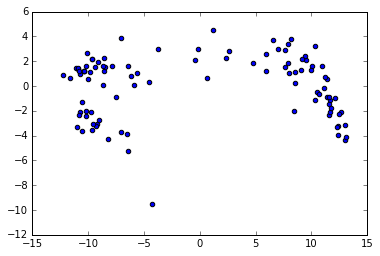

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

display (df.head())
display (df_scores.head())

display(df.loc[:,'x_pca':'y_pca'])

lda_model = LinearDiscriminantAnalysis().fit(df.loc[:,'x_pca':'y_pca'], df['9_clusters'])

# transform scores into 2-dimension PCA data
scores_reduced = lda_model.transform(df.loc[:,'x_pca':'y_pca'])

print scores_reduced

plt.scatter(scores_reduced[:,0],scores_reduced[:,1])

# plt.figure()
# colors = ['navy', 'turquoise', 'darkorange']
# lw = 2

# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('PCA of IRIS dataset')

# plt.figure()
# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('LDA of IRIS dataset')

# plt.show()



# #add to original data frame
# df['x_pca'] = scores_reduced[:,0]
# df['y_pca'] = scores_reduced[:,1]

# #set x-axis, y-axis for each of dem, rep, ind, lib, green parties
# x_d = df['x_pca'][df['party']=="D"]
# x_r = df['x_pca'][df['party']=="R"]
# x_i = df['x_pca'][df['party']=="I"]
# x_l = df['x_pca'][df['party']=="L"]
# x_g = df['x_pca'][df['party']=="G"]

# y_d = df['y_pca'][df['party']=="D"]
# y_r = df['y_pca'][df['party']=="R"]
# y_i = df['y_pca'][df['party']=="I"]
# y_l = df['y_pca'][df['party']=="L"]
# y_g = df['y_pca'][df['party']=="G"]


# #self-note: good reference for setting custom legends with scatter: http://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend

# #set individual plots per party
# plot_d = plt.scatter(x_d, y_d, marker='o', color='b', linewidth=0.4, edgecolor='black', alpha=0.8)
# plot_r = plt.scatter(x_r, y_r, marker='o', color='r', linewidth=0.4, edgecolor='black', alpha=0.8)
# plot_i = plt.scatter(x_i, y_i, marker='o', color='purple', linewidth=0.4, edgecolor='black', alpha=0.8)
# plot_l = plt.scatter(x_l, y_l, marker='o', color='gold', linewidth=0.4, edgecolor='black', alpha=0.8)
# plot_g = plt.scatter(x_g, y_g, marker='o', color='green', linewidth=0.4, edgecolor='black', alpha=0.8)

# # plot poisonous mushrooms
# # r_plot = plt.scatter(train_data_pois[:,0], train_data_pois[:,1], marker='o', color='r', linewidth=0.4, edgecolor='black', alpha=0.5)

# #set up title, legend, and show plot
# plt.title('PCA mapping in 2-dimensions')
# plt.legend((plot_d, plot_r, plot_i, plot_l, plot_g),
#            ("Democrat","Republican","Independent","Libertarian","Green"),
#           scatterpoints=1,
#            ncol=1,
#           loc='upper right',
#           fontsize=8)
# plt.show()



**COMPARE TO SIMPLE SOCIAL-ECONOMIC MAPPING**

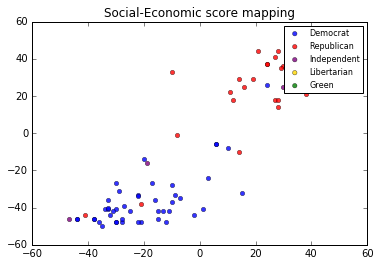

In [16]:
social_economic = np.asarray(df[['social','economic']])

#set x-axis, y-axis for each of dem, rep, ind, lib, green parties
social_d = df['social'][df['party']=="D"]
social_r = df['social'][df['party']=="R"]
social_i = df['social'][df['party']=="I"]
social_l = df['social'][df['party']=="L"]
social_g = df['social'][df['party']=="G"]

econ_d = df['economic'][df['party']=="D"]
econ_r = df['economic'][df['party']=="R"]
econ_i = df['economic'][df['party']=="I"]
econ_l = df['economic'][df['party']=="L"]
econ_g = df['economic'][df['party']=="G"]


#self-note: good reference for setting custom legends with scatter: http://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend

#set individual plots per party
plot2_d = plt.scatter(social_d, econ_d, marker='o', color='b', linewidth=0.4, edgecolor='black', alpha=0.8)
plot2_r = plt.scatter(social_r, econ_r, marker='o', color='r', linewidth=0.4, edgecolor='black', alpha=0.8)
plot2_i = plt.scatter(social_i, econ_i, marker='o', color='purple', linewidth=0.4, edgecolor='black', alpha=0.8)
plot2_l = plt.scatter(social_l, econ_l, marker='o', color='gold', linewidth=0.4, edgecolor='black', alpha=0.8)
plot2_g = plt.scatter(social_g, econ_g, marker='o', color='green', linewidth=0.4, edgecolor='black', alpha=0.8)

# plot poisonous mushrooms
# r_plot = plt.scatter(train_data_pois[:,0], train_data_pois[:,1], marker='o', color='r', linewidth=0.4, edgecolor='black', alpha=0.5)

#set up title, legend, and show plot
plt.title('Social-Economic score mapping')
plt.legend((plot2_d, plot2_r, plot2_i, plot2_l, plot2_g),
           ("Democrat","Republican","Independent","Libertarian","Green"),
          scatterpoints=1,
           ncol=1,
          loc='upper right',
          fontsize=8)
plt.show()

In [17]:
##In the above, is there a mis-labeled "R" in the bottom-left?

**SHOW SOCIAL-ECONOMIC MAPPING BY PCA-ASSIGNED CLUSTER**

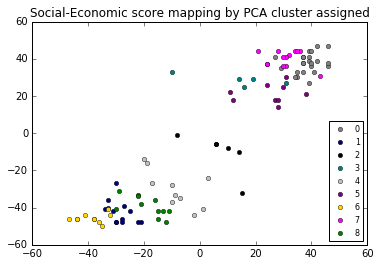

In [18]:
#set x-axis, y-axis for each of dem, rep, ind, lib, green parties

social_0 = df['social'][df['9_clusters']==0]
social_1 = df['social'][df['9_clusters']==1]
social_2 = df['social'][df['9_clusters']==2]
social_3 = df['social'][df['9_clusters']==3]
social_4 = df['social'][df['9_clusters']==4]
social_5 = df['social'][df['9_clusters']==5]
social_6 = df['social'][df['9_clusters']==6]
social_7 = df['social'][df['9_clusters']==7]
social_8 = df['social'][df['9_clusters']==8]

econ_0 = df['economic'][df['9_clusters']==0]
econ_1 = df['economic'][df['9_clusters']==1]
econ_2 = df['economic'][df['9_clusters']==2]
econ_3 = df['economic'][df['9_clusters']==3]
econ_4 = df['economic'][df['9_clusters']==4]
econ_5 = df['economic'][df['9_clusters']==5]
econ_6 = df['economic'][df['9_clusters']==6]
econ_7 = df['economic'][df['9_clusters']==7]
econ_8 = df['economic'][df['9_clusters']==8]




#self-note: good reference for setting custom legends with scatter: http://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend

#set individual plots per party
plot3_0 = plt.scatter(social_0, econ_0, marker='o', color='gray', linewidth=0.4, edgecolor='black', alpha=1)
plot3_1 = plt.scatter(social_1, econ_1, marker='o', color='navy', linewidth=0.4, edgecolor='black', alpha=1)
plot3_2 = plt.scatter(social_2, econ_2, marker='o', color='black', linewidth=0.4, edgecolor='black', alpha=1)
plot3_3 = plt.scatter(social_3, econ_3, marker='o', color='teal', linewidth=0.4, edgecolor='black', alpha=1)
plot3_4 = plt.scatter(social_4, econ_4, marker='o', color='silver', linewidth=0.4, edgecolor='black', alpha=1)
plot3_5 = plt.scatter(social_5, econ_5, marker='o', color='purple', linewidth=0.4, edgecolor='black', alpha=1)
plot3_6 = plt.scatter(social_6, econ_6, marker='o', color='gold', linewidth=0.4, edgecolor='black', alpha=1)
plot3_7 = plt.scatter(social_7, econ_7, marker='o', color='fuchsia', linewidth=0.4, edgecolor='black', alpha=1)
plot3_8 = plt.scatter(social_8, econ_8, marker='o', color='green', linewidth=0.4, edgecolor='black', alpha=1)


# plot poisonous mushrooms
# r_plot = plt.scatter(train_data_pois[:,0], train_data_pois[:,1], marker='o', color='r', linewidth=0.4, edgecolor='black', alpha=0.5)

#set up title, legend, and show plot
plt.title('Social-Economic score mapping by PCA cluster assigned')
plt.legend((plot3_0, plot3_1, plot3_2, plot3_3, plot3_4, plot3_5, plot3_6, plot3_7, plot3_8),
           ("0","1","2","3","4","5","6","7","8"),
          scatterpoints=1,
           ncol=1,
          loc='lower right',
          fontsize=8)
plt.show()

**KMEANS ASSIGNMENT FOR REGULAR SOCIAL-ECONOMIC MAPPING**  
_DOES NOT SHOW AS WELL AS WITH PCA_


TOTAL CLUSTERS: 1


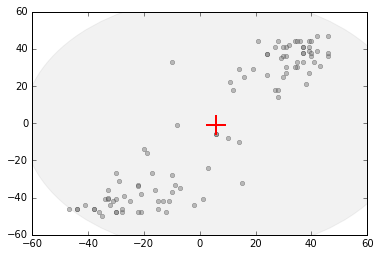


TOTAL CLUSTERS: 2


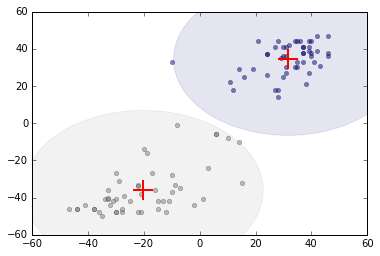


TOTAL CLUSTERS: 3


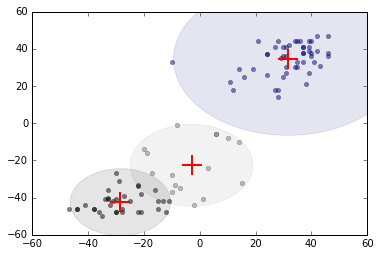


TOTAL CLUSTERS: 4


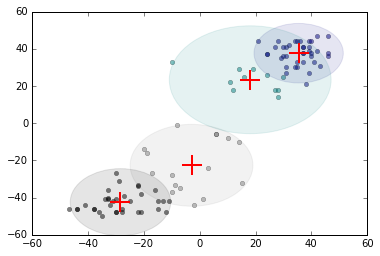


TOTAL CLUSTERS: 5


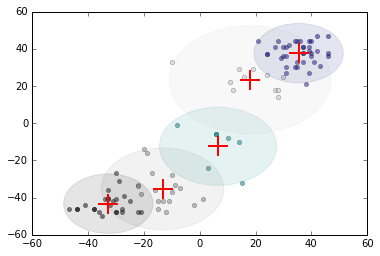


TOTAL CLUSTERS: 6


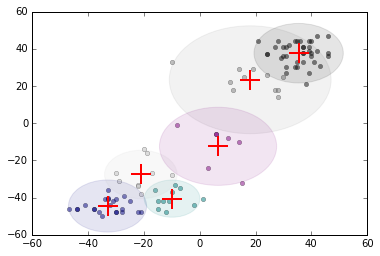


TOTAL CLUSTERS: 7


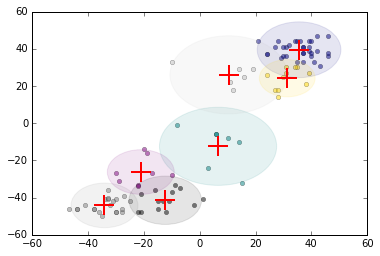


TOTAL CLUSTERS: 8


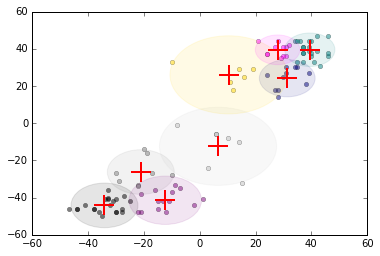


TOTAL CLUSTERS: 9


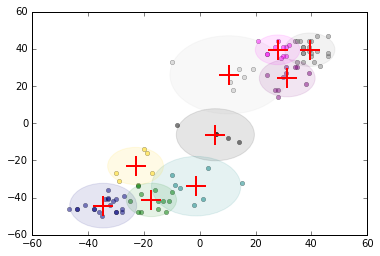


TOTAL CLUSTERS: 10


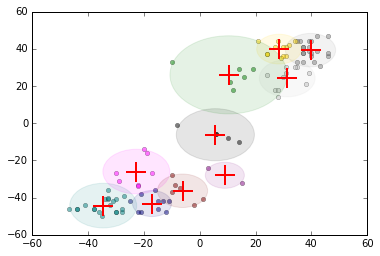


TOTAL CLUSTERS: 11


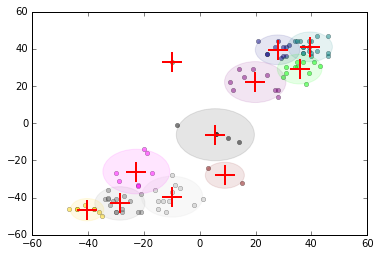


TOTAL CLUSTERS: 12


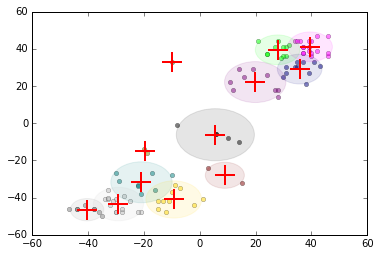


TOTAL CLUSTERS: 13


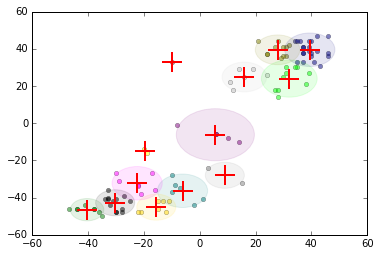


TOTAL CLUSTERS: 14


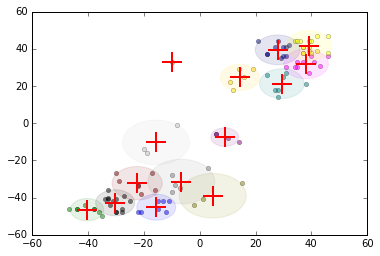


TOTAL CLUSTERS: 15


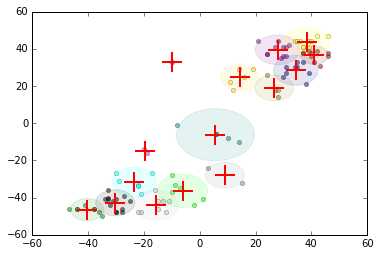


TOTAL CLUSTERS: 16


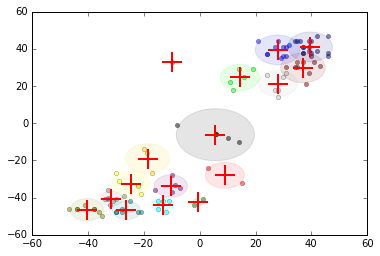

In [19]:
# import random
# random.seed(1)

kmeans_max = 16

#set up 16 colors to consistently map colors to depending on cluster #
colors = ["gray","navy","black","teal","silver","purple","gold",
          "fuchsia","green","maroon","lime","olive","yellow","blue","aqua","red"]

for num in range(kmeans_max):
    #reset matrix back to original PCA training data matrix at start of each for loop
    clusters_matrix = social_economic

    #set kmeans number. range starts at 0 but want kmeans to start at 1
    kmeans_num = num+1     

    #set up kmeans model, get centers, labels, distances
    kmeans_model = KMeans(n_clusters=kmeans_num, random_state=1).fit(social_economic)
    kmeans_centers = kmeans_model.cluster_centers_
    kmeans_labels = kmeans_model.labels_
    kmeans_distances = kmeans_model.transform(social_economic)  #returns matrix with distances to EACH centroid

    #add cluster labels, distances to clusters matrix
    clusters_matrix = np.insert(clusters_matrix, 2, kmeans_labels, axis=1)

    #print k-means number of total clusters
    print "\nTOTAL CLUSTERS:", kmeans_num

    #create sub-loop to plot each cluster
    for num in range(kmeans_num) :

        #add distance to new col in matrix related to centroid number
        clusters_matrix = np.insert(clusters_matrix, 3+num, kmeans_distances[:,num], axis=1)      

        #get kmeans_center for centroid
        kmeans_center_x = kmeans_centers[num][0]
        kmeans_center_y = kmeans_centers[num][1]

        #get just the subset of data belonging to cluster
        clusters_matrix_subset = clusters_matrix[clusters_matrix[:, 2] == num]

        #get max_distance of column related to distance for that centroid; later used for radius
        max_distance = np.max(clusters_matrix_subset[:,3+num])

        #plot just that cluster
        plt.scatter(clusters_matrix_subset[:,0], clusters_matrix_subset[:,1], marker='o', 
                    color=colors[num], linewidth=0.4, edgecolor='black', alpha=0.5)

        #set axes
        plt.xlim(-60, 60)
        plt.ylim(-60, 60)
        
        #plot center associated with that cluster
        plt.plot(kmeans_centers[num][0],kmeans_centers[num][1], marker='+', color='red', 
                 markersize=20, markeredgewidth=2)

        #plot circle (self-note: good reference http://stackoverflow.com/questions/9215658/plot-a-circle-with-pyplot) 
        circle = plt.Circle((kmeans_center_x, kmeans_center_y), max_distance, color=colors[num], alpha=0.1)
        fig = plt.gcf()
        ax = fig.gca()
        ax.add_artist(circle)

    plt.show()